In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# from matplotlib.animation import FFMpegWriter
from tensorflow.keras.callbacks import Callback

plt.style.use('dark_background')

import random 

In [2]:
def outputFunction(input_array):
    # define your function values here in form of output array
    output_array = np.array([np.sin(2 * x) - np.cos(x) for x in input_array])

    function_name = "sin2x-cosx"

    return output_array, function_name

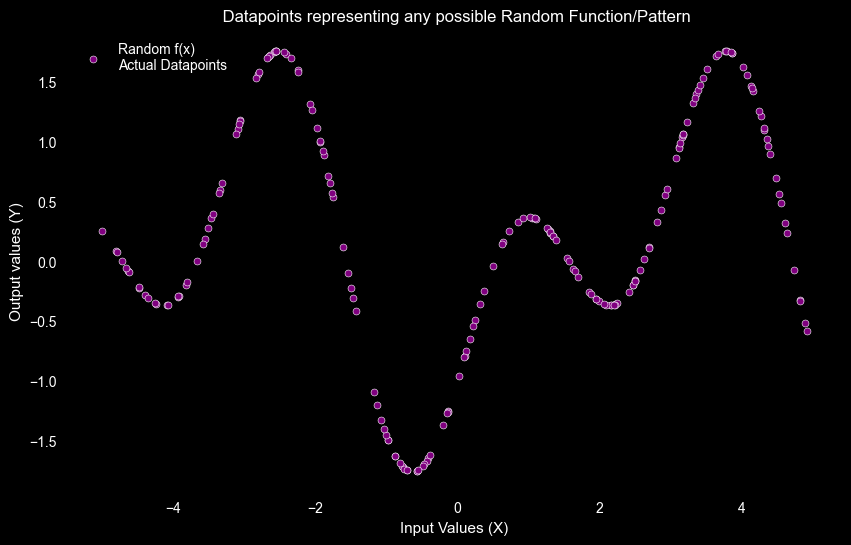

In [12]:

# Generate synthetic data for demonstration
np.random.seed(42)
input_array = np.array([random.uniform(-5,5) for _ in range(200)])
output_array, function_name = outputFunction(input_array)


input_array_reshaped = input_array.reshape(-1,1)
output_array_reshaped = output_array.reshape(-1, 1) 

plt.figure(figsize=(10,6))
sns.scatterplot(x=input_array, y=output_array, color="purple", label="Random f(x)\nActual Datapoints", s=25)
plt.title(" Datapoints representing any possible Random Function/Pattern")
plt.xlabel("Input Values (X)")
plt.ylabel("Output values (Y)")
plt.grid(visible=False)
plt.show()

In [13]:

# Create and compile the neural network model
model = Sequential([
    Dense(16, input_shape=(1,), activation= 'relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


c:\Users\thaku\anaconda3\envs\ml_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,505 (37.13 KB)

 Trainable params: 9,505 (37.13 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
class SaveLinePlotCallback(Callback):
    def __init__(self, input_features, output_array, output_dir):
        self.input_features = input_features  
        self.output_array = output_array.flatten()
        self.output_dir = output_dir
        os.makedirs(output_dir, exist_ok=True) 

    def on_epoch_end(self, epoch, logs=None):
        # Generate predictions
        pred_values = self.model.predict(self.input_features).flatten()

        # Plot actual vs predicted values
        plt.figure(figsize=(9, 6))
        sns.scatterplot(x=input_array, y=self.output_array, label="Actual datapoints", color = 'purple', s=22)  
        sns.lineplot(x=input_array, y=pred_values, label="Model Learning curve", color='lightblue')
        plt.xlabel("Input Feature (X)")
        plt.ylabel("Output Value (Y)")
        plt.title(f"Learning Progress NN (Epoch {epoch + 1}), (Loss: {logs['loss']:.4f})")
        plt.legend()
        plt.grid(visible=False)

        plt.xlim(min(input_array)-1, max(input_array)+1)
        plt.ylim(min(output_array)-1, max(output_array)+1)

        # Save the plot as an image
        img_name = (f"0{epoch}" if epoch<10 else f"{epoch}")
        file_path = os.path.join(self.output_dir, f'lineplot_epoch_{img_name}.png')
        plt.savefig(file_path)
        plt.close()


In [16]:
output_dir = "epoch_lineplots_normal"

save_lineplot_callback = SaveLinePlotCallback(
    input_features=input_array_reshaped,
    output_array=output_array_reshaped,
    output_dir=output_dir
)

# Train the model
history = model.fit(
    input_array_reshaped,
    output_array_reshaped,
    epochs=60,
    batch_size=8,
    callbacks=[save_lineplot_callback]
)

print(f"Line plots for each epoch saved in '{output_dir}'")


Epoch 1/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepp - loss: 1.4553 - mae: 1.01
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.9752 - mae: 0.8076
Epoch 2/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.6531 - mae: 0.7281
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8092 - mae: 0.7684
Epoch 3/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.6177 - mae: 0.6960 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7891 - mae: 0.7500
Epoch 4/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.9559 - mae: 0.809
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7676 - mae: 0.7430
Epoch 5/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step p - loss: 0.7614 - mae: 0.7724
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6718 - mae: 0.7067
Epoch 6/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4129 - mae: 0.580
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4882 - mae: 0.5978
Epoch 7/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.5228 - mae: 0.5944
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/s

In [17]:
# Create a video from the saved images
def create_video_from_images(image_dir, video_name, fps=2):
    images = sorted([img for img in os.listdir(image_dir)])
    frame = cv2.imread(os.path.join(image_dir, images[0]))
    height, width, layers = frame.shape
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_dir, image)))

    cv2.destroyAllWindows()
    video.release()

# Generate video
video_name = f"training_progress_normal_{function_name}.mp4"
create_video_from_images(output_dir, video_name, fps=2)

print(f"Video saved as '{video_name}'")


Video saved as 'training_progress_normal_sin2x-cosx.mp4'
